In [528]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

In [529]:
!pip install gdown

In [530]:
!gdown 1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_

Downloading...
From: https://drive.google.com/uc?id=1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_
To: C:\Users\ANA\Downloads\heart.csv

  0%|          | 0.00/11.3k [00:00<?, ?B/s]
100%|##########| 11.3k/11.3k [00:00<?, ?B/s]


In [531]:
data = pd.read_csv('heart.csv')

In [532]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


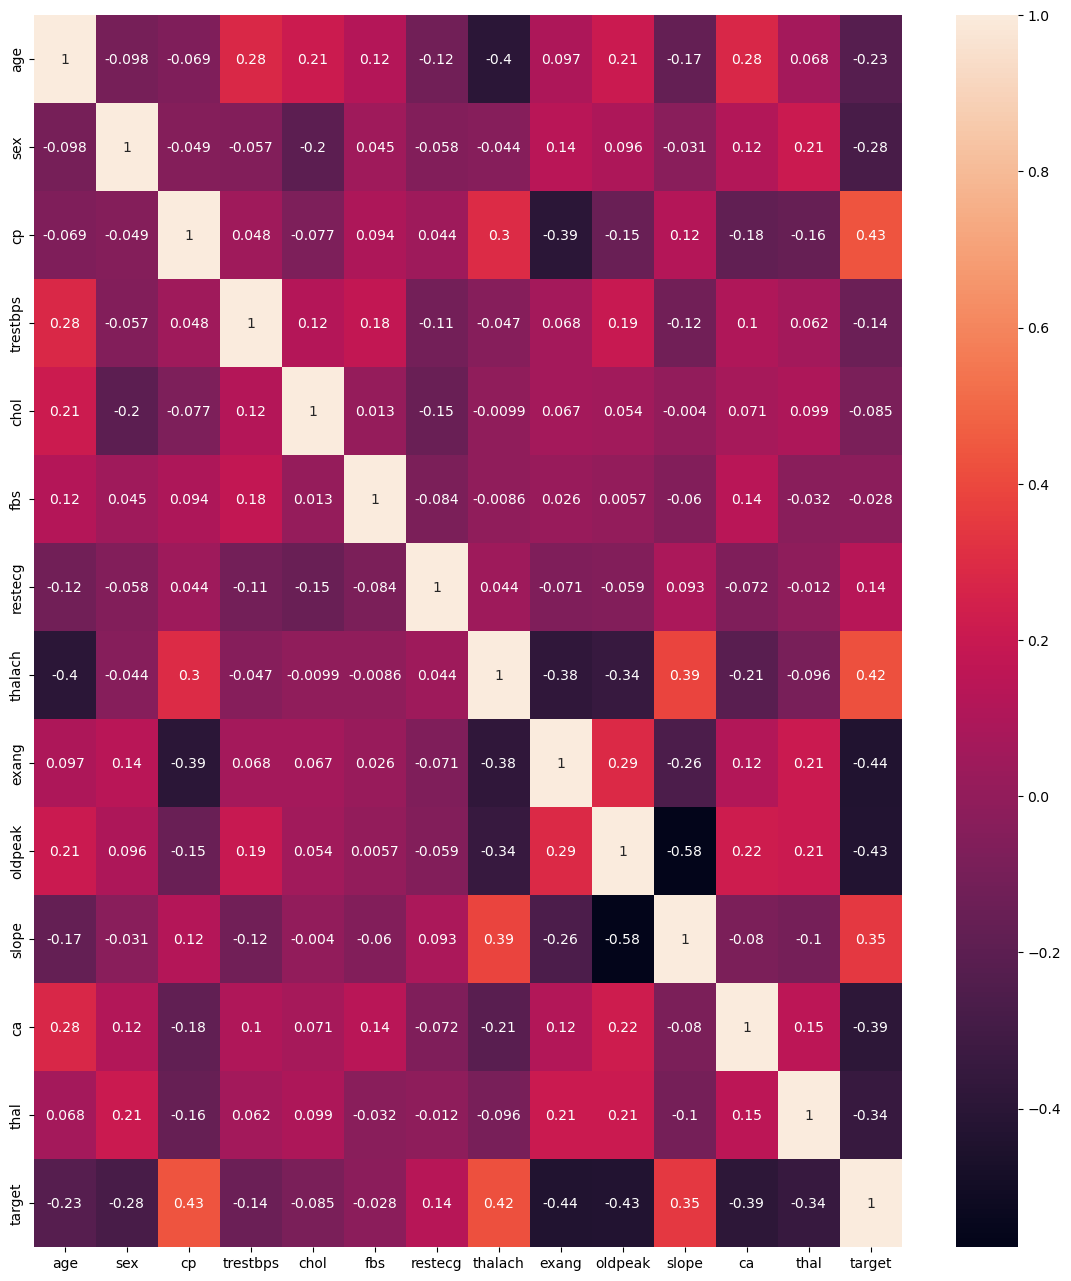

In [533]:
plt.figure(figsize=(14,16))
sns.heatmap(data.corr(), annot=True)
plt.show()

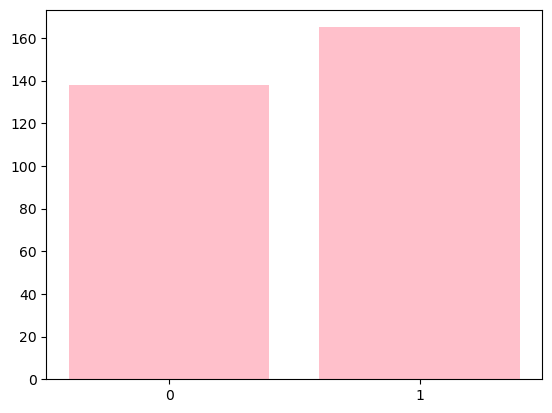

In [534]:
target_counts = data.groupby('target').size()
plt.bar(target_counts.index.astype(str), target_counts, color='pink')
plt.show()

In [535]:
def visualize(data, columns):
    plt.figure(figsize=(14,4))
    for i in range(0, len(columns)):
        plt.subplot(1, len(columns), i+1)
        plt.scatter(x=data[data['target'] == 1]['age'], y=data[data['target'] == 1][columns[i]], color='purple')
        plt.scatter(x=data[data['target'] == 0]['age'], y=data[data['target'] == 0][columns[i]], color='pink')
        plt.xlabel('Age')
        plt.ylabel(columns[i])
        plt.legend(['Disease', 'No Disease'])

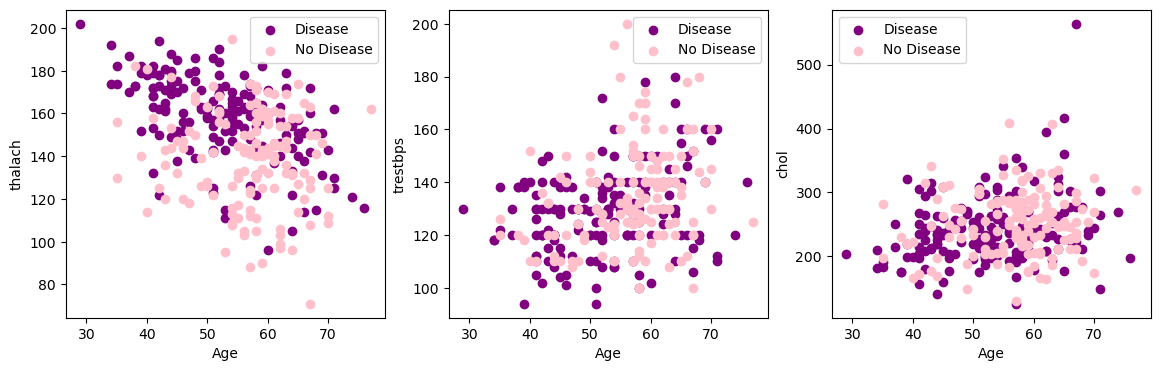

In [536]:
visualize(data, ['thalach', 'trestbps', 'chol'])

In [537]:
X = data.drop('target', axis=1)
Y = data['target']

In [538]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [539]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [540]:
len(train_X[0])

13

In [541]:
model = Sequential([
    # shape needs to be of python series type
    Input(shape=(13,)),

    # input layer
    Dense(32, kernel_initializer="uniform", activation="relu"),

    # hidden layers
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),

    # output layer
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

In [542]:
# compile sets the model ready for training

model.compile(
    # binary_crossentropy is good for a binary classification
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [543]:
# loss functions: categorical_crossentropy - multiclass classification , mean_squared_error, mean_absolute_error - for regression ...

In [544]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [545]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=50, batch_size=8)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5738 - loss: 0.6929 - val_accuracy: 0.5600 - val_loss: 0.6924
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5600 - val_loss: 0.6922
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 0.6925 - val_accuracy: 0.5600 - val_loss: 0.6887
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5647 - loss: 0.6850 - val_accuracy: 0.5600 - val_loss: 0.6580
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5481 - loss: 0.6535 - val_accuracy: 0.7600 - val_loss: 0.5857
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7761 - loss: 0.5611 - val_accuracy: 0.8800 - val_loss: 0.5492
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7811 - loss: 0.5481 - val_accuracy: 0.8400 - val_loss: 0.5078
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7577 - loss: 0.5128 - val_accuracy: 0.8400 - val_loss

<Axes: >

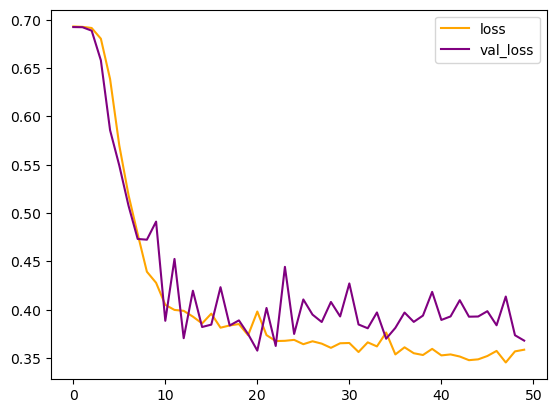

In [546]:
sns.lineplot(history.history['loss'], label='loss', color='orange')
sns.lineplot(history.history['val_loss'], label='val_loss', color='purple')

In [547]:
pred_y = model.predict(test_X).round()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


<Axes: >

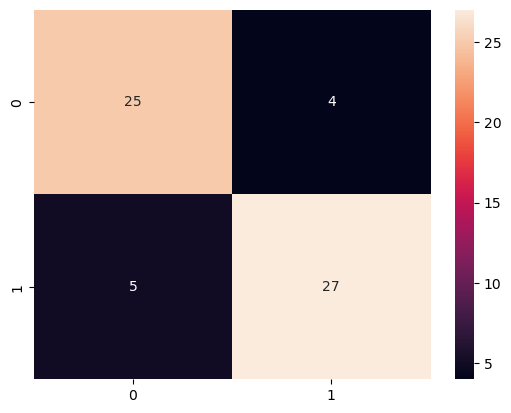

In [548]:
matrix = confusion_matrix(test_y, pred_y)
sns.heatmap(matrix, annot=True)

In [549]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [550]:
## Regression with Neural Networks

In [551]:
!gdown 11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H

Downloading...
From: https://drive.google.com/uc?id=11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H
To: C:\Users\ANA\Downloads\Admission_Predict.csv

  0%|          | 0.00/12.9k [00:00<?, ?B/s]
100%|##########| 12.9k/12.9k [00:00<?, ?B/s]


In [552]:
data = pd.read_csv('Admission_Predict.csv')

In [553]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [554]:
data.drop('Serial No.', inplace=True, axis=1)

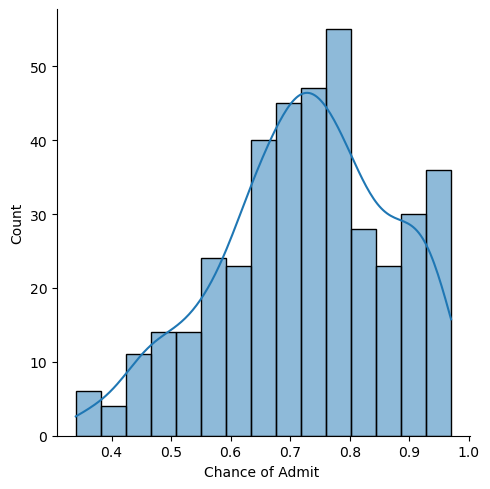

In [555]:
# there is a whitespace after Chance of Admit
sns.displot(data[data.columns[7]], bins=15, kde=True)
plt.show()

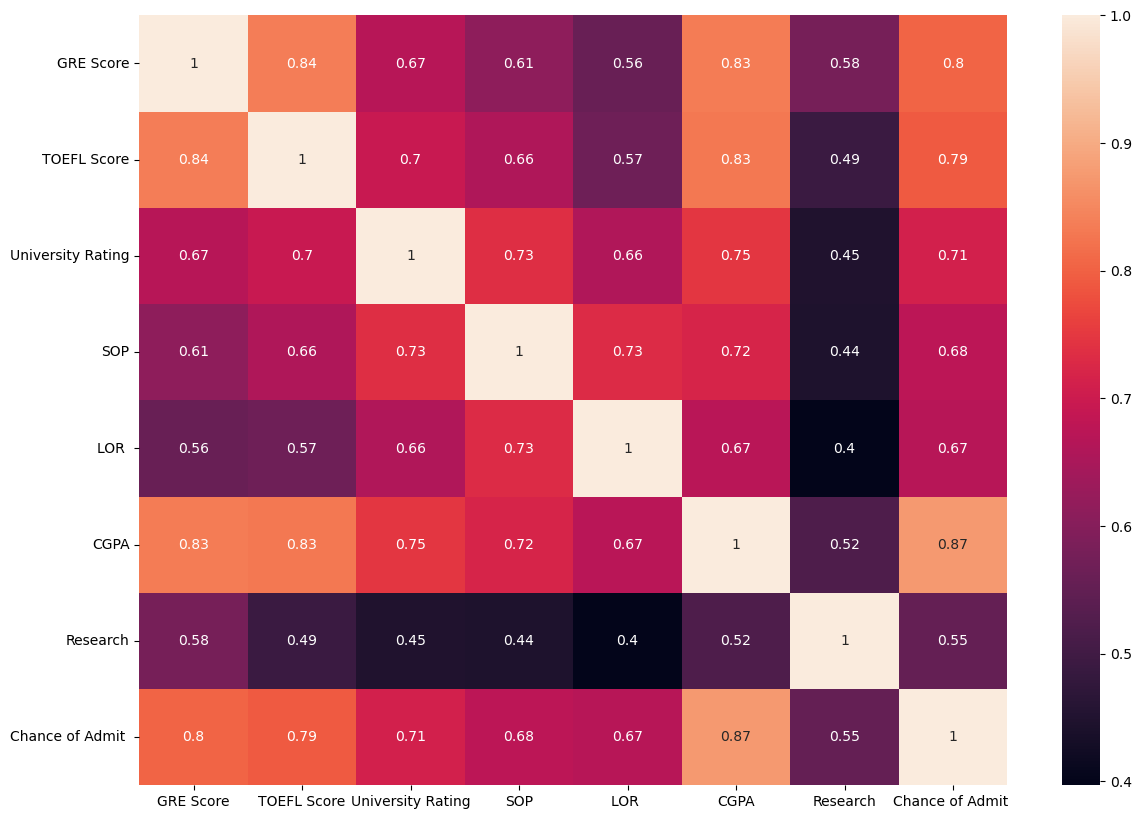

In [556]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [557]:
X = data.drop('Chance of Admit ', axis=1)
Y = data['Chance of Admit ']

In [558]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [559]:
train_X.shape[1]

7

In [560]:
model = Sequential([
    Input(shape=(7,)),
    
    Dense(8, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

In [561]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [562]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [563]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 2/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 3/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 4/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 5/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 6/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 7/64
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0253 - val_mean_

<Axes: >

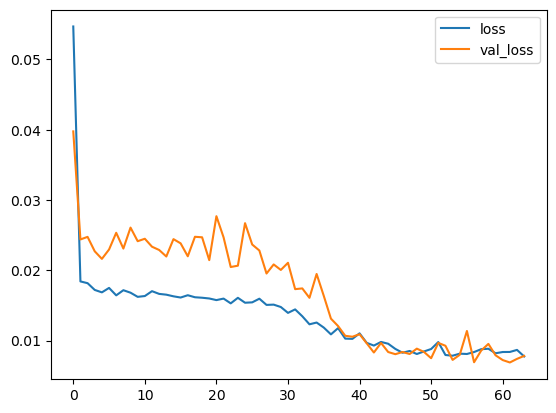

In [564]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [565]:
pred_y = model.predict(test_X)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [566]:
r2_score(test_y, pred_y)

0.6340287924175734